<a href="https://colab.research.google.com/github/viniciusvmda/procedural-texture/blob/master/gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação Genética
https://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/

## Requisitos

In [0]:
# GP
!pip install deap
# Graphics
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz networkx
# Noise functions
!pip install noise

## Bibliotecas

In [0]:
# Genetic Programming
from deap import base, creator, gp, tools
# Graphics
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib import pyplot as plt
# Computer vision
import cv2
# Util
import numpy as np
import random
# Operators
from noise import pnoise3, pnoise2

## Desenvolvimento

### Gráficos

In [0]:
def plotTree(expr):
  nodes, edges, labels = gp.graph(expr)
  
  g = nx.DiGraph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = graphviz_layout(g, prog="dot")

  nx.draw_networkx_nodes(g, pos)
  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, labels)
  
  plt.show()
  
def plotImage(data):
  plt.axis("off")
  plt.imshow(data, cmap='binary')



### Algoritmo

#### Funções fitness

In [0]:
def getHistogram(img):
  hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8],
		[0, 256, 0, 256, 0, 256])
	hist = cv2.normalize(hist, hist).flatten()
  return hist;


# Colour Direct Matching
def cdir(img1, img2):
  method = "Correlation"
  hist1 = getHistogram(img1)
  hist2 = getHistogram(img2)
  d = cv2.compareHist(index["doge.png"], hist, method)
  return d

#### Operadores

In [0]:
image = np.zeros((1024, 1024))

#import noise
#help(noise)

# persistence: [0,1]
def perlinNoise(scale=100, octaves=6, persistence=0.5, lacunarity=2.0):
  width = image.shape[0]
  height = image.shape[1]
  output = np.zeros((width, height))
  for x in range(0, width):
    for y in range(0, height):
        output[x][y] = pnoise2(x/scale, y/scale, octaves=octaves, 
                                persistence=persistence, lacunarity=lacunarity,
                                base=0)
  return output

#out = perlinNoise(image, octaves=1)
#plotImage(out)

#### Estrutura da árvore

perlinNoise(ARG0, ARG2, ARG1)


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


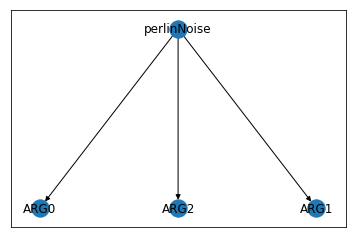

In [378]:
pset = gp.PrimitiveSetTyped("main", [np.ndarray, float, float, float], np.ndarray)

def func(a):
  b = np.zeros((10,10))
  b[0][0] = a
  return b

# Add operators
pset.addPrimitive(perlinNoise, [np.ndarray, float, float], np.ndarray)
pset.addPrimitive(func, [float], np.ndarray)


# Create individual and add tree with primitives
creator.create("Individual", gp.PrimitiveTree, pset=pset)
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
expr = toolbox.individual()
tree = gp.PrimitiveTree(expr)
f = gp.compile(tree, pset)
nodes, edges, labels = gp.graph(expr)
print(tree)
plotTree(expr)

In [314]:
f(image, 50)

array([[ 0.        ,  0.00027404,  0.00054809, ...,  0.14666323,
         0.13400792,  0.12612611],
       [ 0.04133539,  0.03941675,  0.04346306, ...,  0.17091143,
         0.16427021,  0.15913361],
       [ 0.06274841,  0.05821995,  0.05891114, ...,  0.19569927,
         0.18180454,  0.16023421],
       ...,
       [-0.05976691, -0.08542277, -0.10795452, ..., -0.11489918,
        -0.09504117, -0.08019667],
       [-0.05648531, -0.07996882, -0.09648081, ..., -0.11665219,
        -0.09870996, -0.07141144],
       [-0.02852576, -0.05608363, -0.06996056, ..., -0.13397495,
        -0.11023446, -0.0834334 ]])